In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *
from scipy.constants import h, hbar, k as kb
from itertools import product
from scipy import optimize
from importlib import reload
import pickle
import logging

logging.getLogger().setLevel(logging.WARNING)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import Transmon
reload(Transmon)
from Transmon import *

import TransmonControl
reload(TransmonControl)
from TransmonControl import *

import DoubleTransmonSystem
reload(DoubleTransmonSystem)
from DoubleTransmonSystem import *

import Sidebands
reload(Sidebands)
from Sidebands import *

import TwoToneSimulation
reload(TwoToneSimulation)
from TwoToneSimulation import *

In [19]:
from ReadoutResonator import *

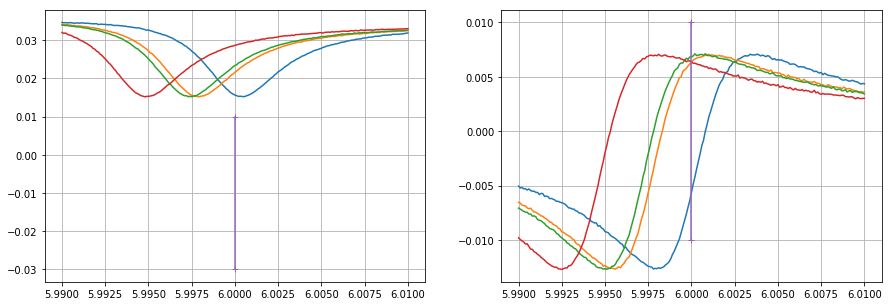

In [20]:
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
chi1, chi2 = .25e-3*10, .3e-3*10
plt.subplot(1,2,1)
r.plot()
r.plot(chi1)
r.plot(chi2)
r.plot(chi1+chi2)
plot([6.000]*2, [-0.03, 0.01], "-+")
grid()
plt.subplot(1,2,2)
r.plot(digest = np.imag)
r.plot(chi1, digest = np.imag)
r.plot(chi2, digest = np.imag)
r.plot(chi1+chi2, digest = np.imag)
plot([6.000]*2, [-0.01, 0.01], "-+")
grid()
plt.gcf().set_size_inches(15,5)

In [3]:
## Double Transmon System parameters (manually fitted with care)
Nc = 7

Ec1 = 0.22 *2* np.pi 
Ec2 = 0.22 *2* np.pi # used to be 0.23
Ecc = 0.004 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element # was 0.005/1.2 **2
Ej1 = 24.3 *2* np.pi
Ej2 = 18.2 *2* np.pi
d = 0.7

T1_1, T2_1 = 10e3, 5e3
T1_2, T2_2 = 5e3, 1e3

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 2)

#TC = TransmonControl(tr1)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)

SweetSpot1 = 4.14 #4.14
SweetSpot2 = 4.12

T1 = 11.0 #higher "\/" #11.1 #periods of the spectrum curves
T2 = 6.4 #lower "/\    #6.4 

### Two-tone plot

In [5]:
dyn = TwoToneSimulation(dts, SweetSpot1, SweetSpot2,T1, T2)
dyn.H = dyn.generate_H_RF_RWA
dyn.steady = dyn.steady_RWA
dyn.set_amps(0.1, 0.05)
dyn.set_grid(2, 6, 5.1, 5.5, 401, 401)
dyn.generate_caches()

Generating caches...
OK

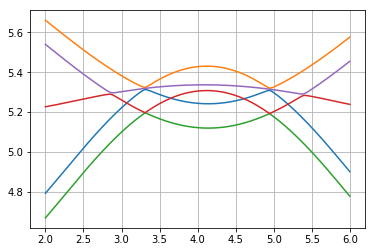

In [6]:
dts.plot_spectrum(dyn.phi1s, dyn.phi2s, currents=dyn.currs)

In [7]:
A = dyn.run(12)

In [8]:
nstate = 0
data = []
for i in range(0, len(dyn.currs)):
    row = []
    for j in range(0, len(dyn.freqs)):  # range (0, self.Lf, self.Lf//self.res_f):
        row.append(dyn.spec[i][j][nstate][0][nstate].real)  ## [i][j] correct
    data.append(row)

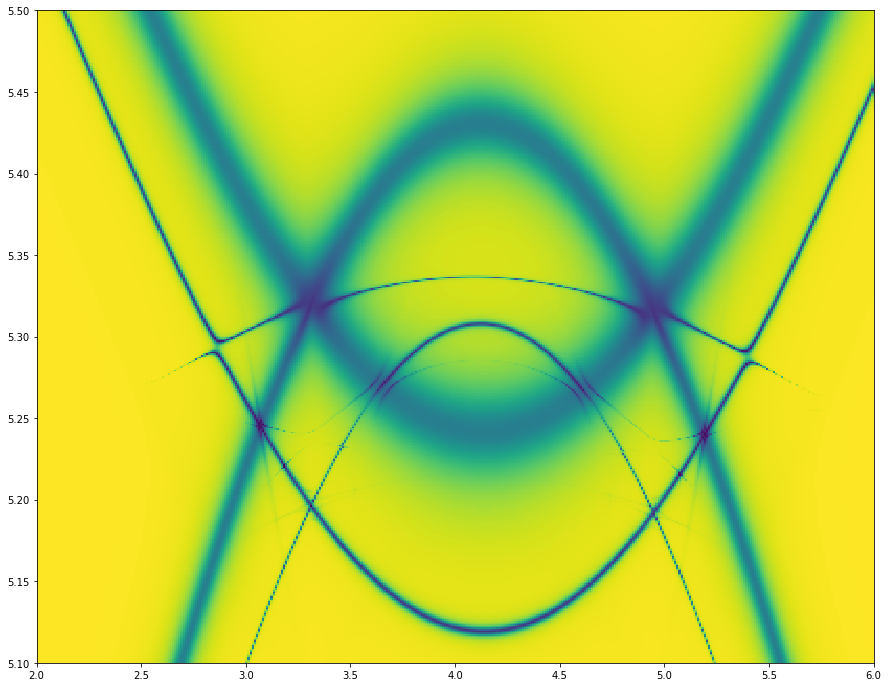

In [9]:
pcolormesh(dyn.currs, dyn.freqs, (array(data).T))
plt.gcf().set_size_inches(15,12)

dict_keys(['phi2', 'amp1', 'dts', 'period1', 's1', 'phi2s', 'phi1', 'freq', 'phi1s', 'freqs', 'options', 's2', 'period2', 'currs', 'H', 'amp2', 'steady', 'spec'])

In [18]:
with open("two-tone-0.1-0.05.pkl", "wb") as f:
    pickle.dump(dyn.spec, f)

In [16]:
from ReadoutResonator import *

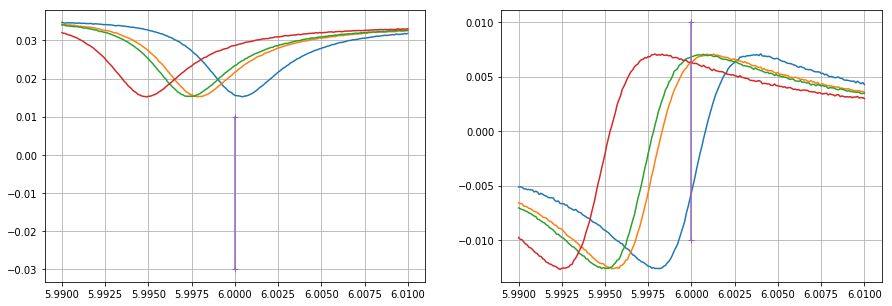

In [17]:
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
chi1, chi2 = .25e-3*10, .3e-3*10
plt.subplot(1,2,1)
r.plot()
r.plot(chi1)
r.plot(chi2)
r.plot(chi1+chi2)
plot([6.000]*2, [-0.03, 0.01], "-+")
grid()
plt.subplot(1,2,2)
r.plot(digest = np.imag)
r.plot(chi1, digest = np.imag)
r.plot(chi2, digest = np.imag)
r.plot(chi1+chi2, digest = np.imag)
plot([6.000]*2, [-0.01, 0.01], "-+")
grid()
plt.gcf().set_size_inches(15,5)

### AT splitting direct observation

In [36]:
import ATSplittingSimulation
reload(ATSplittingSimulation)
from ATSplittingSimulation import *

In [37]:
ATS = ATSplittingSimulation(dts, SweetSpot1, SweetSpot2, T1, T2)

In [38]:
ATS.set_amplitudes(0.01, 0.01)
ATS.set_grid(linspace(5.21, 5.33, 151), linspace(5.21, 5.33, 151))
ATS.set_fluxes_from_current(3.65)

In [39]:
ATS.generate_caches()

In [40]:
dts.H(ATS.phi1, ATS.phi2)/2/pi

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.05538370e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 5.39192505e+00 0.00000000e+00 6.05538370e-03
  0.00000000e+00 8.36562079e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.05400967e+01 0.00000000e+00
  8.36562079e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.05538370e-03 0.00000000e+00 5.26913379e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.36034012e-03
  0.00000000e+00]
 [6.05538370e-03 0.00000000e+00 8.36562079e-03 0.00000000e+00
  1.06610588e+01 0.00000000e+00 8.36034012e-03 0.00000000e+00
  1.15499593e-02]
 [0.00000000e+00 8.36562079e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.58092304e+01 0.00000000e+00 1.15499593e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [41]:
mesolve(ATS.H(), dts.gg_state(ATS.phi1, ATS.phi2), 
        linspace(0, 100, 2), 
        c_ops = dts.c_ops(ATS.phi1, ATS.phi2), args = {"wd2":ATS.freq1}, progress_bar=True,
        options= ATS.options)

50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.07s


Result object with mesolve data.
--------------------------------
states = True
num_collapse = 0

In [43]:
ATS.run(12)

In [47]:
ATS.spec

KeyboardInterrupt: 

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        nstate = 3*i+j
        data = []
        for k in range(0, len(ATS.freq1s)):
            row = []
            for m in range(0, len(ATS.freq2s)):  # range (0, self.Lf, self.Lf//self.res_f):
                row.append(ATS.spec[k][m][nstate][0][nstate].real)  ## [i][j] correct
            data.append(row)
        
        m = axes[i,j].pcolormesh(ATS.freq2s, ATS.freq1s, 10*log10(array(data).T))
        axes[i,j].set_ylabel("$f_1$")
        axes[i,j].set_xlabel("$f_2$")
        plt.colorbar(m ,ax = axes[i,j])
#         axes[i,j].grid()
plt.tight_layout()

/home/gleb/py35/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa1cc47dae8> (for post_execute):


TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

TypeError: Cannot cast ufunc subtract output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

<Figure size 1080x864 with 18 Axes>

In [203]:
nstate = 8
data = []
for i in range(0, len(ATS.freq1s)):
    row = []
    for j in range(0, len(ATS.freq2s)):  # range (0, self.Lf, self.Lf//self.res_f):
        row.append(ATS.spec[i][j][nstate][0][nstate].real)  ## [i][j] correct
    data.append(row)

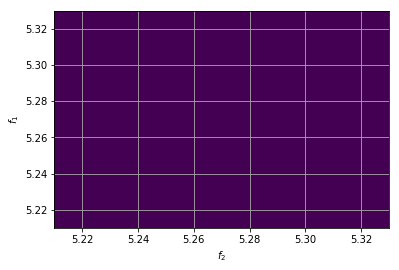

In [173]:
0.1/2/pi*2

0.03183098861837907